In [1]:
import psycopg2
import pandas as pd

In [2]:
DBNAME = "opportunity_youth"

In [3]:
conn = psycopg2.connect(dbname=DBNAME)

In [4]:
cursor = conn.cursor()
cursor.execute("""SELECT table_name FROM information_schema.tables
       WHERE table_schema = 'public'""")
tables = []
for table in cursor.fetchall():
    tables.append(table[0])
tables

['pums_2017',
 'puma_names_2010',
 'wa_jobs_2017',
 'wa_geo_xwalk',
 'ct_puma_xwalk']

In [5]:
#pd.read_sql("""SELECT * FROM puma_names_2010 WHERE state_name LIKE 'Washington%' AND puma_name LIKE 'King County%';""", conn)



In [6]:
pums_2017_df = pd.read_sql("SELECT * FROM pums_2017 LIMIT 20;", conn)
puma_names_2010_df = pd.read_sql("SELECT * FROM puma_names_2010 LIMIT 20;", conn)
wa_jobs_2017_df = pd.read_sql("SELECT * FROM wa_jobs_2017 LIMIT 20;", conn)
#wa_geo_xwalk_df = pd.read_sql("SELECT * FROM wa_geo_xwalk limit 100;", conn)
ct_puma_xwalk_df = pd.read_sql("SELECT * FROM ct_puma_xwalk LIMIT 20;", conn)

In [7]:
#wa_geo_xwalk_df= pd.read_sql("""SELECT ctyname, blklatdd, blklondd 
                                FROM wa_geo_xwalk
                                WHERE ctyname LIKE 'King County%';""", conn)
#created datafile that defined the greater King country area using lat, long coordinates
#wa_geo_xwalk_df

IndentationError: unexpected indent (<ipython-input-7-f4923189c1fb>, line 2)

In [8]:
wa_geo_xwalk_df.items()

NameError: name 'wa_geo_xwalk_df' is not defined

In [9]:
wa_geo_xwalk_df.shape

NameError: name 'wa_geo_xwalk_df' is not defined

In [51]:
conda list

# packages in environment at C:\Users\ptann\Anaconda3\envs\oy-env:
#
# Name                    Version                   Build  Channel
attrs                     19.3.0                     py_0  
backcall                  0.1.0                    py38_0  
blas                      1.0                         mkl  
bleach                    3.1.4                      py_0  
bzip2                     1.0.8                he774522_0  
ca-certificates           2020.6.20            hecda079_0    conda-forge
certifi                   2020.6.20                pypi_0    pypi
cffi                      1.14.0           py38h7a1dbc1_0  
chardet                   3.0.4                 py38_1003  
click                     7.1.2                      py_0  
click-plugins             1.1.1                      py_0  
cligj                     0.5.0                    py38_0  
colorama                  0.4.3                      py_0  
cryptography              2.9.2            py38h7a1dbc1_0  
curl 

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [11]:
gdf = gpd.read_file("data/shapefiles/ipums_puma_2010.shp")

In [12]:
gdf.head()

,GISMATCH,GISJOIN,GEOID,STATEFIP,State,PUMA,Name,geometry
0,600105,G06000105,0600105,06,California,00105,"Alameda County (West)--San Leandro, Alameda & ...","MULTIPOLYGON (((-2258646.530 342733.341, -2258..."
1,600102,G06000102,0600102,06,California,00102,Alameda County (Northwest)--Oakland (Northwest...,"POLYGON ((-2259099.372 353383.127, -2259101.40..."
2,608502,G06008502,0608502,06,California,08502,Santa Clara County (Northwest)--Sunnyvale & Sa...,"POLYGON ((-2246220.131 304622.390, -2246216.04..."
3,600108,G06000108,0600108,06,California,00108,"Alameda County (Southwest)--Union City, Newark...","MULTIPOLYGON (((-2247215.331 305414.315, -2247..."
4,600107,G06000107,0600107,06,California,00107,Alameda County (Central)--Hayward City PUMA,"POLYGON ((-2244205.948 331582.334, -2244209.13..."


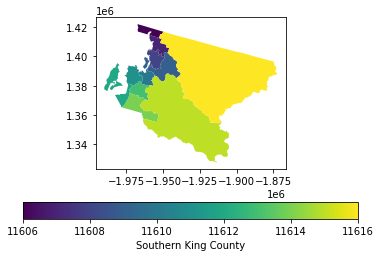

In [13]:
#gdf[gdf.State=='Washington'].plot()
gdf["PUMA"] = gdf["PUMA"].astype(str).astype(int)
greater_king_co_map= gdf[(gdf.PUMA >= 11606) & (gdf.PUMA <= 11616)]
south_king_co_map=gdf[(gdf.PUMA >= 11612) & (gdf.PUMA <= 11615)]
#gdf["so_king_co"] = gdf[(gdf.PUMA >= 11612) & (gdf.PUMA <= 11615)]
#gdf = gdf[(gdf.PUMA >= 11606) & (gdf.PUMA <= 11616)]
fig, ax=plt.subplots(1,1)

greater_king_co_map.plot(column='PUMA',ax=ax, legend = True, legend_kwds={'label': "Southern King County",
                                                                          'orientation':"horizontal"})
plt.show()




#gdf.info()
#gdf[(gdf.PUMA<somenum) & (gdf.PUMA>somenum)]
#df["a"] = df["a"].astype(str).astype(int)


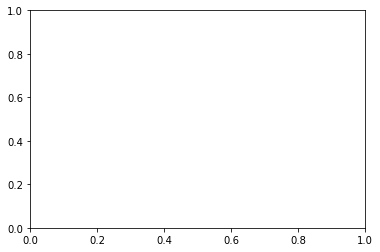

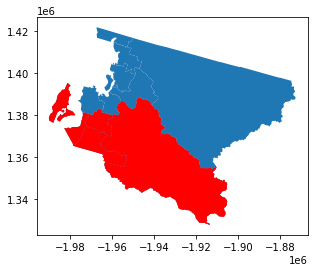

In [14]:
fig, ax = plt.subplots(1,1)

ax=south_king_co_map.plot(color='red', zorder= 2)
greater_king_co_map.plot(ax=ax, zorder=1);






In [11]:
#king_co_df_map = geopandas.GeoDataFrame(wa_geo_xwalk_df,
                                        geometry = geopandas.points_from_xy(wa_geo_xwalk_df.blklatdd,
                 
#created a df map of king county using geopandas.                                                                            wa_geo_xwalk_df.blklongdd))
#print(wa_geo_xwalk_df.head())

NameError: name 'geopandas' is not defined

In [13]:
! conda list


# packages in environment at C:\Users\ptann\Anaconda3\envs\oy-env:
#
# Name                    Version                   Build  Channel
attrs                     19.3.0                     py_0  
backcall                  0.1.0                    py38_0  
blas                      1.0                         mkl  
bleach                    3.1.4                      py_0  
bzip2                     1.0.8                he774522_0  
ca-certificates           2020.6.20            hecda079_0    conda-forge
certifi                   2020.6.20                pypi_0    pypi
cffi                      1.14.0           py38h7a1dbc1_0  
chardet                   3.0.4                 py38_1003  
click                     7.1.2                      py_0  
click-plugins             1.1.1                      py_0  
cligj                     0.5.0                    py38_0  
colorama                  0.4.3                      py_0  
cryptography              2.9.2            py38h7a1dbc1_0  
curl 

In [ ]:
#unemployment codes:
# EMR  employment status code , unemployed status = 6-- not in labor force
#WKHP , 0 --

In [ ]:
#school status codes:


In [88]:
pd.read_sql("""SELECT * FROM puma_names_2010 WHERE state_name LIKE 'Washington%' AND puma_name LIKE 'King County%';""", conn)

,state_fips,state_name,cpuma0010,puma,geoid,gisjoin,puma_name
0,53,Washington ...,1044,11606,5311606,G53011606,"King County (Northwest)--Shoreline, Kenmore & ..."
1,53,Washington ...,1044,11607,5311607,G53011607,"King County (Northwest)--Redmond, Kirkland Cit..."
2,53,Washington ...,1044,11608,5311608,G53011608,King County (Northwest Central)--Greater Belle...
3,53,Washington ...,1044,11609,5311609,G53011609,"King County (Central)--Sammamish, Issaquah, Me..."
4,53,Washington ...,1044,11610,5311610,G53011610,"King County (Central)--Renton City, Fairwood, ..."
5,53,Washington ...,1044,11613,5311613,G53011613,King County (Southwest Central)--Kent City ...
6,53,Washington ...,1044,11614,5311614,G53011614,King County (Southwest)--Auburn City & Lakelan...
7,53,Washington ...,1044,11615,5311615,G53011615,"King County (Southeast)--Maple Valley, Covingt..."
8,53,Washington ...,1044,11616,5311616,G53011616,"King County (Northeast)--Snoqualmie City, Cott..."
9,53,Washington ...,1045,11611,5311611,G53011611,"King County (West Central)--Burien, SeaTac, Tu..."
